In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
%matplotlib inline

# Top-Level Comments

In [15]:
df = pd.read_csv('data/askreddit_top_50.csv')

In [16]:
df.head()

,id,parent_id,link_id,gilded,author,created,is_submitter,permalink,score,body,question,target
0,ed1czme,t3_ablzuq,t3_ablzuq,0,sweatybeard,2019-01-01 15:35:24,False,/r/AskReddit/comments/ablzuq/people_who_havent...,12169,"But when I finally do, it'll be the years bigg...","People who haven't pooped in 2019 yet, why are...",0
1,ed1d2z7,t3_ablzuq,t3_ablzuq,1,ButtholeLinoleum,2019-01-01 15:36:36,False,/r/AskReddit/comments/ablzuq/people_who_havent...,14259,I've been pissing out my ass all fuckin day.,"People who haven't pooped in 2019 yet, why are...",1
2,ed1emmi,t3_ablzuq,t3_ablzuq,0,abksploder,2019-01-01 15:56:33,False,/r/AskReddit/comments/ablzuq/people_who_havent...,34844,Bold of you to assume I'm going to take a shit...,"People who haven't pooped in 2019 yet, why are...",0
3,ed1dhh6,t3_ablzuq,t3_ablzuq,0,adsadsadsadsads,2019-01-01 15:41:49,False,/r/AskReddit/comments/ablzuq/people_who_havent...,19268,We have guests and I literally can't relax.,"People who haven't pooped in 2019 yet, why are...",0
4,ed1dqvy,t3_ablzuq,t3_ablzuq,2,KixStar,2019-01-01 15:45:09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,35941,I caught a diarrhea stomach bug and have been ...,"People who haven't pooped in 2019 yet, why are...",1


In [17]:
df.isnull().sum()

id              0
parent_id       0
link_id         0
gilded          0
author          0
created         0
is_submitter    0
permalink       0
score           0
body            0
question        0
target          0
dtype: int64

In [18]:
df[df.duplicated()]

,id,parent_id,link_id,gilded,author,created,is_submitter,permalink,score,body,question,target


In [19]:
np.argmax(df['gilded'])

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


2278

In [20]:
df['gilded'][2278]

23

In [21]:
df.groupby('gilded')['id'].count()

gilded
0     4543
1      359
2       58
3       17
4        7
5        5
6        3
7        3
12       1
15       1
16       1
20       1
23       1
Name: id, dtype: int64

In [22]:
for question in df['question'].unique():
    print(question)

People who haven't pooped in 2019 yet, why are you still holding on to last years shit?
Stan Lee has passed away at 95 years old
Reddit, how would you feel about a law that bans radio stations from playing commercials with honking/beeping/siren noises in them?
Without saying what the category is, what are your top five?
Anthony Bourdain once said "There's a guy in my head, and all he wants to do is lay in bed all day long, smoke pot, and watch old movies and cartoons. My life is a series of strategems, to avoid, and outwit that guy". Who is "that guy" for you, and what do you do to avoid him?
With all of the negative headlines dominating the news these days, it can be difficult to spot signs of progress. What makes you optimistic about the future?
[Serious] Americans, would you be in support of putting a law in place that government officials, such as senators and the president, go without pay during shutdowns like this while other federal employees do? Why, or why not?
Iceland just an

## Exploring the minority class

In [43]:
import nltk
import string
from scipy import stats

def tokenize(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()

    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        return stem.stem(token)
    
def simplify_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)


In [26]:
# Create dataframe containing only gilded comments
df_gilded = df[df.target == 1]

In [27]:
from nltk import FreqDist

golds = df_gilded['body'].tolist()
gold_corpus = [tokenize(doc) for doc in golds]
fdist = FreqDist(gold_corpus)

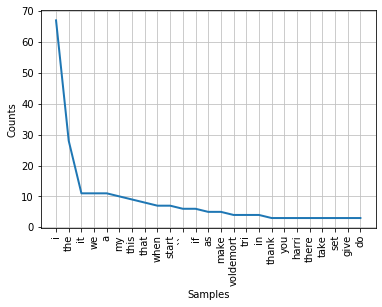

In [33]:
# Plotting the most frequent words in gilded comments
fdist.plot(25)

In [35]:
# Creating word count columns

df['simplebody'] = df['body'].map(lambda x: simplify_text(x))
df['num_wds'] = df['simplebody'].apply(lambda x: len(x.split()))
print("Word Counts (All Comments)")
print("Mean: ", df['num_wds'].mean(), "Min: ", df['num_wds'].min(), "Max: ", df['num_wds'].max())

Word Counts (All Comments)
Mean:  58.6956 Min:  1 Max:  1449


In [36]:
df_gilded['simplebody'] = df_gilded['body'].map(lambda x: simplify_text(x))
df_gilded['num_wds'] = df_gilded['simplebody'].apply(lambda x: len(x.split()))
print("Word Counts (Gilded Comments)")
print("Mean: ", df_gilded['num_wds'].mean(), "Min: ", df_gilded['num_wds'].min(), "Max: ", df_gilded['num_wds'].max())

Word Counts (Gilded Comments)
Mean:  89.31947483588621 Min:  1 Max:  1449


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


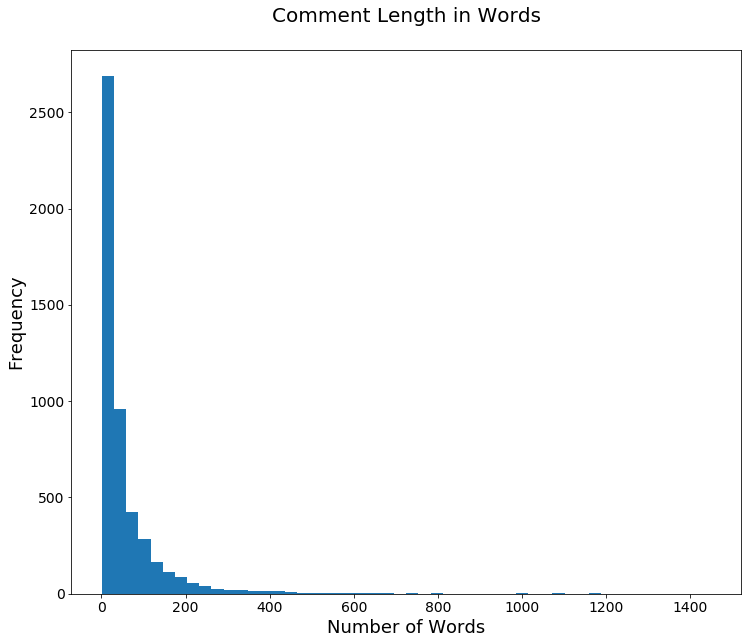

In [37]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Comment Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

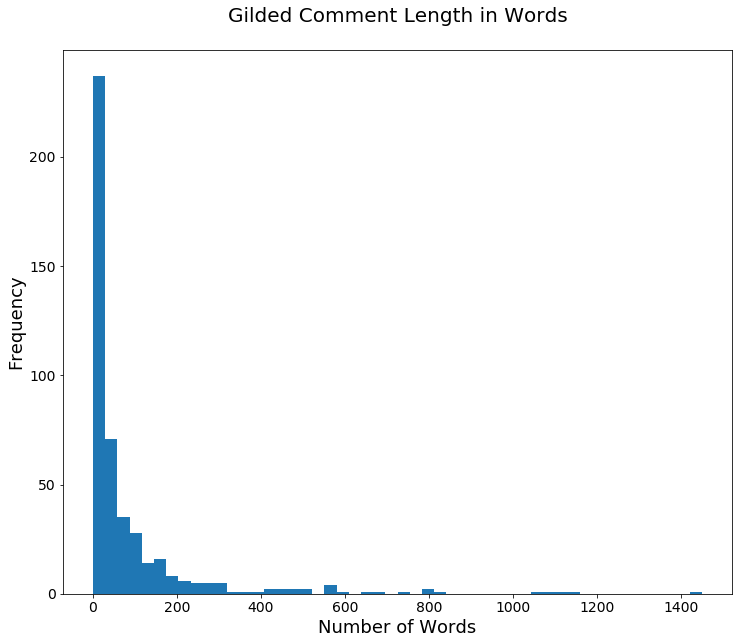

In [38]:
ax=df_gilded['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Gilded Comment Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [41]:
wordcounts = np.array(df["num_wds"])
wordcounts_g = np.array(df_gilded["num_wds"])

In [42]:
# P-value below .05 indicates a significant difference in comment length
stats.ttest_ind(wordcounts, wordcounts_g)

Ttest_indResult(statistic=-5.780463891372362, pvalue=7.862637227785603e-09)